In [91]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Importe de dados

In [3]:
df_animes = pd.read_csv('anime.csv')

## Análise Exploratória dos Dados (EDA)

In [5]:
df_animes.head(5)

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,...,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0


In [6]:
df_animes.columns

Index(['MAL_ID', 'Name', 'Score', 'Genres', 'English name', 'Japanese name',
       'Type', 'Episodes', 'Aired', 'Premiered', 'Producers', 'Licensors',
       'Studios', 'Source', 'Duration', 'Rating', 'Ranked', 'Popularity',
       'Members', 'Favorites', 'Watching', 'Completed', 'On-Hold', 'Dropped',
       'Plan to Watch', 'Score-10', 'Score-9', 'Score-8', 'Score-7', 'Score-6',
       'Score-5', 'Score-4', 'Score-3', 'Score-2', 'Score-1'],
      dtype='object')

In [7]:
df_animes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17562 entries, 0 to 17561
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MAL_ID         17562 non-null  int64 
 1   Name           17562 non-null  object
 2   Score          17562 non-null  object
 3   Genres         17562 non-null  object
 4   English name   17562 non-null  object
 5   Japanese name  17562 non-null  object
 6   Type           17562 non-null  object
 7   Episodes       17562 non-null  object
 8   Aired          17562 non-null  object
 9   Premiered      17562 non-null  object
 10  Producers      17562 non-null  object
 11  Licensors      17562 non-null  object
 12  Studios        17562 non-null  object
 13  Source         17562 non-null  object
 14  Duration       17562 non-null  object
 15  Rating         17562 non-null  object
 16  Ranked         17562 non-null  object
 17  Popularity     17562 non-null  int64 
 18  Members        17562 non-n

In [29]:
df_animes.rename(columns = {'MAL_ID':'anime_id'}, inplace=True)
df_animes.rename(columns = str.lower, inplace = True)
columns = ['anime_id','name', 'score','genres','type', 'episodes', 'studios','source','rating','popularity', \
          'members','completed','on-hold','dropped']
df_animes = df_animes[columns]


In [30]:
display(df_animes)

,anime_id,name,score,genres,type,episodes,studios,source,rating,popularity,members,completed,on-hold,dropped
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,Sunrise,Original,R - 17+ (violence & profanity),39,1251960,718161,71513,26678
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Movie,1,Bones,Original,R - 17+ (violence & profanity),518,273145,208333,1935,770
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",TV,26,Madhouse,Manga,PG-13 - Teens 13 or older,201,558913,343492,25465,13925
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",TV,26,Sunrise,Original,PG-13 - Teens 13 or older,1467,94683,46165,5121,5378
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",TV,52,Toei Animation,Manga,PG - Children,4369,13224,7314,766,1108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17557,48481,Daomu Biji Zhi Qinling Shen Shu,Unknown,"Adventure, Mystery, Supernatural",ONA,Unknown,Unknown,Novel,Unknown,13116,354,0,0,0
17558,48483,Mieruko-chan,Unknown,"Comedy, Horror, Supernatural",TV,Unknown,Passione,Manga,Unknown,17562,7010,0,14,0
17559,48488,Higurashi no Naku Koro ni Sotsu,Unknown,"Mystery, Dementia, Horror, Psychological, Supe...",TV,Unknown,Unknown,Visual novel,R - 17+ (violence & profanity),17558,11309,0,0,0
17560,48491,Yama no Susume: Next Summit,Unknown,"Adventure, Slice of Life, Comedy",TV,Unknown,8bit,Manga,PG-13 - Teens 13 or older,17565,1386,2,2,1


In [89]:
for feature in ['type','source','rating']:
    display(pd.DataFrame(df_animes['anime_id'].groupby(df_animes[feature]).count()) \
            .rename(columns={'anime_id':'quantidade'}))

,quantidade
type,
Movie,3041
Music,1469
ONA,1907
OVA,3894
Special,2218
TV,4996
Unknown,37


,quantidade
source,
4-koma manga,288
Book,112
Card game,64
Digital manga,15
Game,880
Light novel,768
Manga,3825
Music,317
Novel,510


,quantidade
rating,
G - All Ages,5782
PG - Children,1461
PG-13 - Teens 13 or older,6132
R - 17+ (violence & profanity),1157
R+ - Mild Nudity,997
Rx - Hentai,1345
Unknown,688


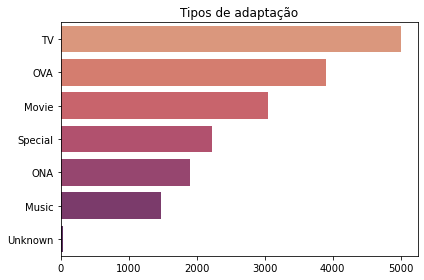

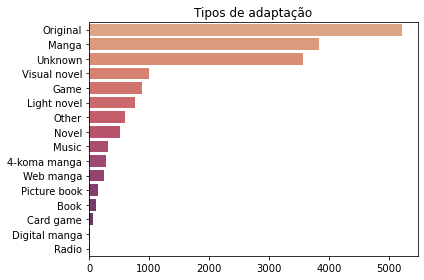

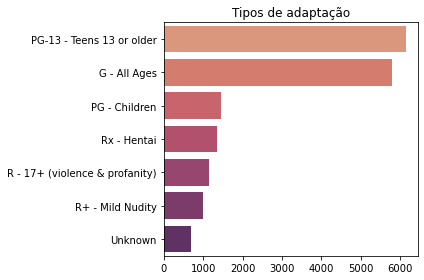

In [103]:
for feature in ['type','source','rating']:
    anime_feature_count = df_animes[feature].value_counts()
    sns.barplot(x=anime_feature_count.values,
                y=anime_feature_count.index,
                palette='flare') \
                .set_title('Tipos de adaptação')
    plt.tight_layout()
    plt.show()

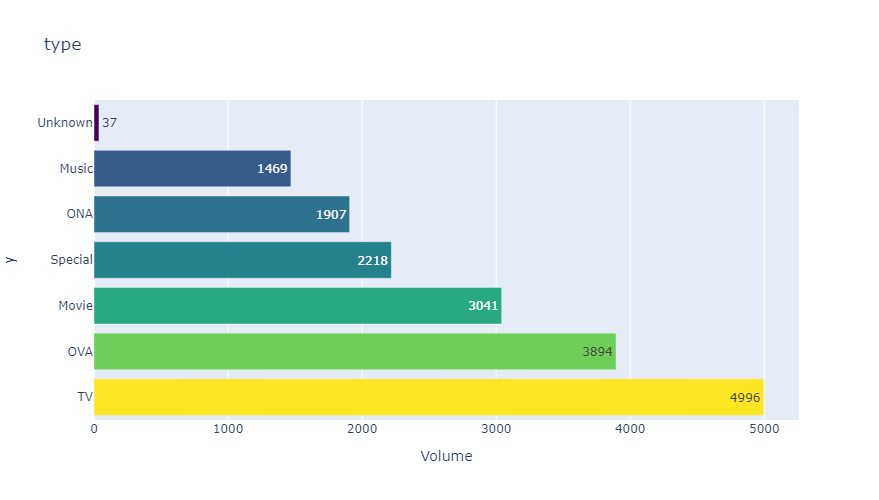

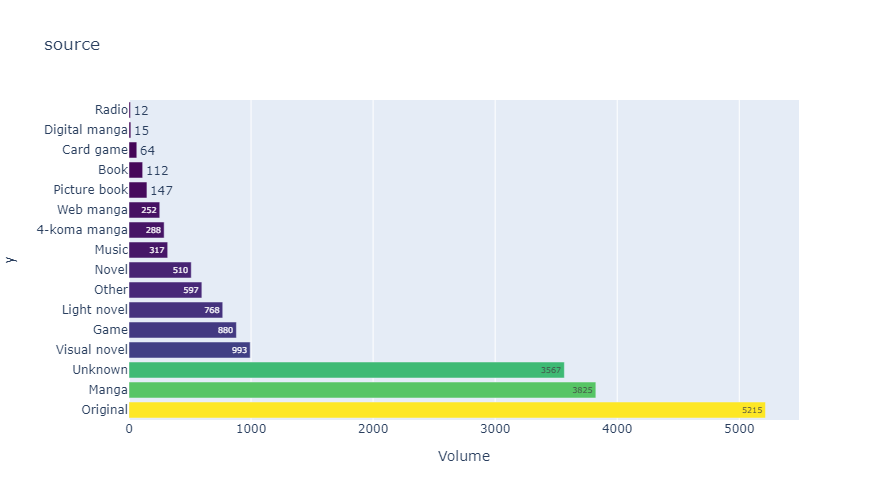

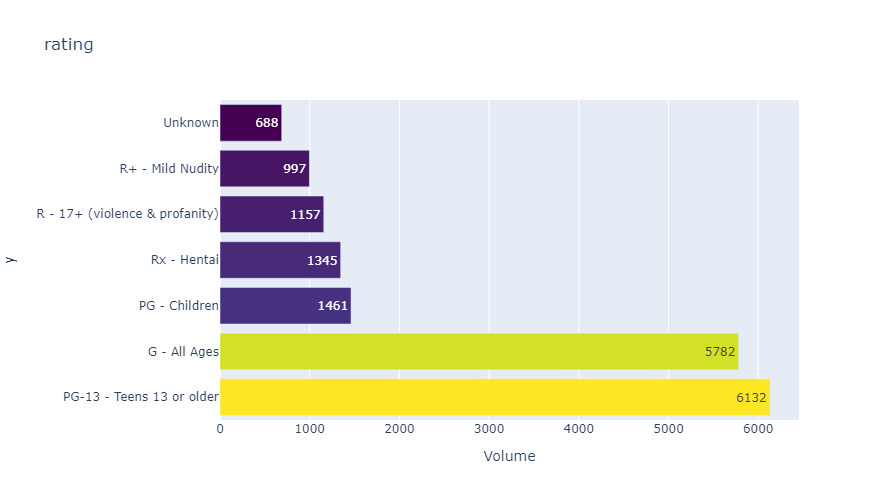

In [203]:
import plotly.express as px
teste = [1,2,3,4]
for feature in ['type','source','rating']:
    anime_feature_count = df_animes[feature].value_counts()
    fig = px.bar(x=anime_feature_count.values,
           y=anime_feature_count.index,
           title=feature,
           text_auto = True,
           height = 500,
           color = anime_feature_count.values,
           hover_name = anime_feature_count.index,
           color_continuous_scale='viridis',
           labels=dict(x="Volume"))
    
    fig.update_layout(hoverlabel=dict(bgcolor="white",font_size=16,font_family="Rockwell"))
    fig.update_traces(hovertemplate=None)
    fig.update(layout_coloraxis_showscale=False)
    fig.show()